# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df['Diff'] = df['Adj Close'].diff().shift(-1)


In [4]:
df['Target'] = np.sign(df['Diff'])

In [5]:
df['Premium'] = 0.08 * df['Adj Close']
df


,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-09-30,170.984741,-0.439423,-1.0,13.678779
2023-10-31,170.545319,19.404678,1.0,13.643625
2023-11-30,189.949997,2.580002,1.0,15.196000


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [8]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30"].copy()

In [9]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)


# 4.) Add columns, prediction and profits.

In [10]:
df['Predictions'] = y_pred

In [11]:
df['Profits'] = 0.

In [12]:
#True positives
df.loc[(df['Predictions']==1) & (df['Target']==1), 'Profits'] = df['Premium']

#False positives
df.loc[(df['Predictions']==1) & (df['Target']==-1), 'Profits'] = df['Diff']*100 + df['Premium']

In [13]:
df

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

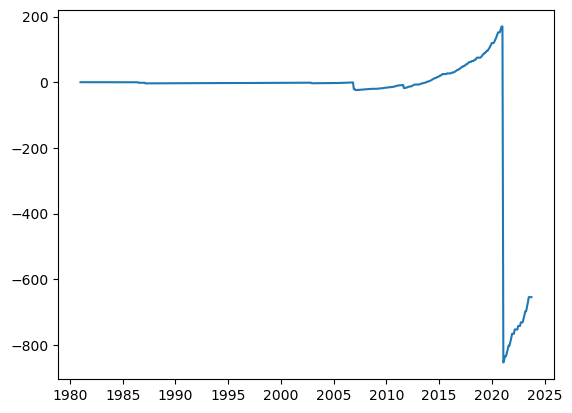

In [14]:
plt.plot(np.cumsum(df['Profits']))
plt.show()

# 5.5 )

Python data analysis can significantly enhance blockchain analysis by enabling the retrieval of blockchain data via APIs, cleaning and preprocessing the data for consistency, conducting statistical analysis and visualization to uncover trends, and applying machine learning to predict market movements or identify patterns, thereby providing valuable insights into blockchain operations and trends.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.